In [28]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [29]:
df_train = pd.read_csv("train_ml.csv", index_col=0)
df_test = pd.read_csv("test_ml.csv", index_col=0)
df_train.shape, df_test.shape

((9557, 142), (23856, 141))

In [30]:
df_train.head()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
Id,,,,,,,,,,,,,,,,,,,,,
ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [31]:
df_train.describe(include='int64')

,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,r4m1,...,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,agesq,Target
count,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,...,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000
mean,0.038087,4.955530,0.023648,0.994768,0.957623,0.231767,0.385895,1.559171,1.945066,0.399184,...,0.714555,0.285445,34.303547,74.222769,1643.774302,19.132887,53.500262,3.844826,1643.774302,3.302292
std,0.191417,1.468381,0.151957,0.072145,0.201459,0.421983,0.680779,1.036574,1.188852,0.692460,...,0.451650,0.451650,21.612261,76.777549,1741.197050,18.751395,78.445804,6.946296,1741.197050,1.009565
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,17.000000,16.000000,289.000000,9.000000,0.000000,0.000000,289.000000,3.000000
50%,0.000000,5.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2.000000,0.000000,...,1.000000,0.000000,31.000000,36.000000,961.000000,16.000000,36.000000,1.000000,961.000000,4.000000
75%,0.000000,6.000000,0.000000,1.000000,1.000000,0.000000,1.000000,2.000000,3.000000,1.000000,...,1.000000,1.000000,51.000000,121.000000,2601.000000,25.000000,81.000000,4.000000,2601.000000,4.000000
max,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,5.000000,8.000000,8.000000,6.000000,...,1.000000,1.000000,97.000000,441.000000,9409.000000,169.000000,441.000000,81.000000,9409.000000,4.000000


In [32]:
df_train.describe(include = 'object')

,idhogar,dependency,edjefe,edjefa
count,9557,9557,9557,9557
unique,2988,31,22,22
top,fd8a6d014,yes,no,no
freq,13,2192,3762,6230


In [33]:
df_train.describe(include='float')

,v2a1,v18q1,rez_esc,meaneduc,overcrowding,SQBovercrowding,SQBdependency,SQBmeaned
count,2.697000e+03,2215.000000,1629.000000,9552.000000,9557.000000,9557.000000,9557.000000,9552.000000
mean,1.652316e+05,1.404063,0.459791,9.231523,1.605380,3.249485,3.900409,102.588867
std,1.504571e+05,0.763131,0.946550,4.167694,0.819946,4.129547,12.511831,93.516890
min,0.000000e+00,1.000000,0.000000,0.000000,0.200000,0.040000,0.000000,0.000000
25%,8.000000e+04,1.000000,0.000000,6.000000,1.000000,1.000000,0.111111,36.000000
50%,1.300000e+05,1.000000,0.000000,9.000000,1.500000,2.250000,0.444444,81.000000
75%,2.000000e+05,2.000000,1.000000,11.600000,2.000000,4.000000,1.777778,134.560010
max,2.353477e+06,6.000000,5.000000,37.000000,6.000000,36.000000,64.000000,1369.000000


In [34]:
df_test.describe(include = 'object')


,idhogar,dependency,edjefe,edjefa
count,23856,23856,23856,23856
unique,7352,35,22,22
top,8e9159699,yes,no,no
freq,13,5388,9056,15845


In [ ]:
#ANS 7.Count null values are existing in columns

In [35]:
int_null=df_train.select_dtypes('int64').isnull().sum(axis=0)
int_null

hacdor            0
rooms             0
hacapo            0
v14a              0
refrig            0
                 ..
SQBhogar_total    0
SQBedjefe         0
SQBhogar_nin      0
agesq             0
Target            0
Length: 130, dtype: int64

In [36]:
int2_null=df_test.select_dtypes('int64').isnull().sum(axis=0)
int2_null

hacdor            0
rooms             0
hacapo            0
v14a              0
refrig            0
                 ..
SQBage            0
SQBhogar_total    0
SQBedjefe         0
SQBhogar_nin      0
agesq             0
Length: 129, dtype: int64

In [37]:
ob_null=df_train.select_dtypes('object').isnull().sum(axis=0)
ob_null

idhogar       0
dependency    0
edjefe        0
edjefa        0
dtype: int64

In [38]:
ob2_null= df_test.select_dtypes('object').isnull().sum()
ob2_null

idhogar       0
dependency    0
edjefe        0
edjefa        0
dtype: int64

In [39]:
fl_null = df_train.select_dtypes('float').isnull().sum(axis=0)
fl_null

v2a1               6860
v18q1              7342
rez_esc            7928
meaneduc              5
overcrowding          0
SQBovercrowding       0
SQBdependency         0
SQBmeaned             5
dtype: int64

In [40]:
fl2_null= df_test.select_dtypes('float').isnull().sum(axis=0)
fl2_null


v2a1               17403
v18q1              18126
rez_esc            19653
meaneduc              31
overcrowding           0
SQBovercrowding        0
SQBdependency          0
SQBmeaned             31
dtype: int64

In [41]:
df_train.idhogar.unique()

array(['21eb7fcc1', '0e5d7a658', '2c7317ea8', ..., 'a8eeafc29',
       '212db6f6c', 'd6c086aa3'], dtype=object)

In [42]:
data = df_train.dependency

In [43]:
data.unique()

array(['no', '8', 'yes', '3', '.5', '.25', '2', '.66666669', '.33333334',
       '1.5', '.40000001', '.75', '1.25', '.2', '2.5', '1.2', '4',
       '1.3333334', '2.25', '.22222222', '5', '.83333331', '.80000001',
       '6', '3.5', '1.6666666', '.2857143', '1.75', '.71428573',
       '.16666667', '.60000002'], dtype=object)

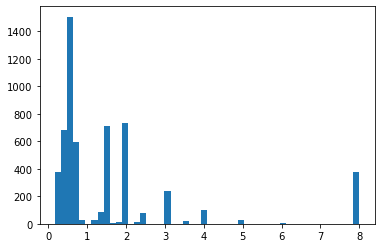

yes          2192
no           1747
.5           1497
2             730
1.5           713
.33333334     598
.66666669     487
8             378
.25           260
3             236
Name: dependency, dtype: int64

In [44]:
plt.hist(data[data.isin(['no','yes'])==False].astype('float'),bins=50)
plt.show()
data.value_counts().head(10)


In [48]:
 df_train.dependency = df_train.dependency.replace('no',0).replace('yes',0.5).astype('float')
df_test.dependency = df_test.dependency.replace('no',0).replace('yes',0.5).astype('float')



In [49]:
 data = df_train.edjefe

In [50]:
df_train['edjefe'].unique()

array(['10', '12', 'no', '11', '9', '15', '4', '6', '8', '17', '7', '16',
       '14', '5', '21', '2', '19', 'yes', '3', '18', '13', '20'],
      dtype=object)

In [51]:
df_train['edjefe'].unique()

array(['10', '12', 'no', '11', '9', '15', '4', '6', '8', '17', '7', '16',
       '14', '5', '21', '2', '19', 'yes', '3', '18', '13', '20'],
      dtype=object)

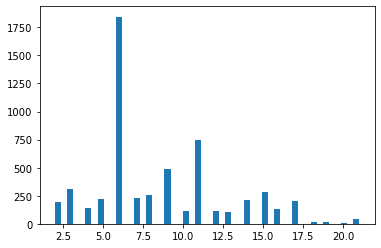

no    3762
6     1845
11     751
9      486
3      307
15     285
8      257
7      234
5      222
14     208
Name: edjefe, dtype: int64

In [52]:
plt.hist(data[ data.isin(['no','yes']) == False ].astype('float'), bins=50)
plt.show()
data.value_counts().head(10)

In [55]:
df_med = np.median(df_train.edjefe[df_train.edjefe.isin(['no','yes'])==False ].astype('float'))
df_train.edjefe = df_train.edjefe.replace('no',0).replace('yes',df_med).astype('float')
df_test.edjefe = df_test.edjefe.replace('no',0).replace('yes',df_med).astype('float')


In [56]:
data = df_train.edjefa

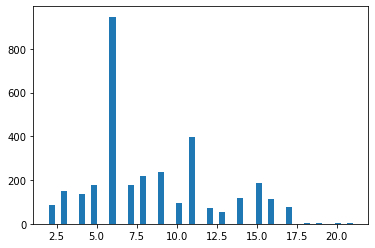

no    6230
6      947
11     399
9      237
8      217
15     188
7      179
5      176
3      152
4      136
Name: edjefa, dtype: int64

In [57]:
plt.hist(data[ data.isin(['no','yes']) == False ].astype('float'), bins=50)
plt.show()
data.value_counts().head(10)


In [60]:
med = np.median(df_train.edjefa[df_train.edjefa.isin(['no','yes'])==False ].astype('float'))
df_train.edjefa = df_train.edjefa.replace('no',0).replace('yes',med).astype('float')
df_test.edjefa = df_test.edjefa.replace('no',0).replace('yes',med).astype('float')


In [61]:
df_train.isnull().sum()


v2a1               6860
hacdor                0
rooms                 0
hacapo                0
v14a                  0
                   ... 
SQBovercrowding       0
SQBdependency         0
SQBmeaned             5
agesq                 0
Target                0
Length: 142, dtype: int64

In [62]:
df_test.isnull().sum()

v2a1               17403
hacdor                 0
rooms                  0
hacapo                 0
v14a                   0
                   ...  
SQBhogar_nin           0
SQBovercrowding        0
SQBdependency          0
SQBmeaned             31
agesq                  0
Length: 141, dtype: int64

In [70]:
print("Percentage of null values in `train['v2a1']` column : ",(df_train['v2a1'].isnull().sum()/df_train.shape[0]*100))
print("Percentage of null values in `train['v18q1']` column : ",(df_train['v18q1'].isnull().sum()/df_train.shape[0]*100))
print("Percentage of null values in `train['rez_esc']` column : ",(df_train['rez_esc'].isnull().sum()/df_train.shape[0]*100))

Percentage of null values in `train['v2a1']` column :  71.7798472323951
Percentage of null values in `train['v18q1']` column :  76.82327090091033
Percentage of null values in `train['rez_esc']` column :  82.95490216595167


In [ ]:
#ANS 8. drop null values sa seen below

In [71]:
 print("Percentage of null values in `test['v2a1']` column : ", (df_test['v2a1'].isnull().sum()/df_test.shape[0]*100))
print("Percentage of null values in `test['v18q1']` column : ",(df_test['v18q1'].isnull().sum()/df_test.shape[0]*100))
print("Percentage of null values in `test['rez_esc']` column : ",(df_test['rez_esc'].isnull().sum()/df_test.shape[0]*100))

Percentage of null values in `test['v2a1']` column :  72.95020120724345
Percentage of null values in `test['v18q1']` column :  75.98088531187123
Percentage of null values in `test['rez_esc']` column :  82.3817907444668


In [72]:
df_train.drop(columns=['v2a1','v18q1','rez_esc'], inplace=True)
df_test.drop(columns=['v2a1','v18q1','rez_esc'], inplace=True)

In [73]:
df_train.shape,df_test.shape

((9557, 139), (23856, 138))

In [74]:
null_columns = df_train.columns[df_train.isnull().any()]
df_train[null_columns].isnull().sum()

meaneduc     5
SQBmeaned    5
dtype: int64

In [75]:
null_columns = df_test.columns[df_test.isnull().any()]
df_test[null_columns].isnull().sum()

meaneduc     31
SQBmeaned    31
dtype: int64

In [78]:
from sklearn.impute import SimpleImputer
SimpleImputer = SimpleImputer(missing_values = np.nan, strategy='median')
SimpleImputer.fit(df_train[['meaneduc','SQBmeaned']])
df_train[['meaneduc','SQBmeaned']] = SimpleImputer.transform(df_train[['meaneduc','SQBmeaned']])
df_test[['meaneduc','SQBmeaned']] = SimpleImputer.transform(df_test[['meaneduc','SQBmeaned']])


In [79]:
print("Null vlaues in train : ",df_train.isnull().any().sum())
print("Null vlaues in test : ",df_test.isnull().any().sum())

Null vlaues in train :  0
Null vlaues in test :  0


In [80]:
df_train.shape, df_test.shape

((9557, 139), (23856, 138))

In [81]:
df_train.columns

Index(['hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q', 'r4h1', 'r4h2',
       'r4h3', 'r4m1',
       ...
       'SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin',
       'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq', 'Target'],
      dtype='object', length=139)

In [82]:
df_test.columns

Index(['hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q', 'r4h1', 'r4h2',
       'r4h3', 'r4m1',
       ...
       'age', 'SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe',
       'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned',
       'agesq'],
      dtype='object', length=138)

In [ ]:
#ANS 1. the output variable is ’Target’
#ANS 2. Understand the type of data

In [83]:
print('Integer Type: ')
print(df_train.select_dtypes(np.int64).columns)
print('\n')
print('float type :')
print(df_train.select_dtypes(np.float64).columns)
print('\n')
print('object type')
print(df_train.select_dtypes(np.object).columns)

Integer Type: 
Index(['hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q', 'r4h1', 'r4h2',
       'r4h3', 'r4m1',
       ...
       'area1', 'area2', 'age', 'SQBescolari', 'SQBage', 'SQBhogar_total',
       'SQBedjefe', 'SQBhogar_nin', 'agesq', 'Target'],
      dtype='object', length=130)


float type :
Index(['dependency', 'edjefe', 'edjefa', 'meaneduc', 'overcrowding',
       'SQBovercrowding', 'SQBdependency', 'SQBmeaned'],
      dtype='object')


object type
Index(['idhogar'], dtype='object')


C:\Users\User\AppData\Local\Temp\ipykernel_268900\606859701.py:8: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(df_train.select_dtypes(np.object).columns)


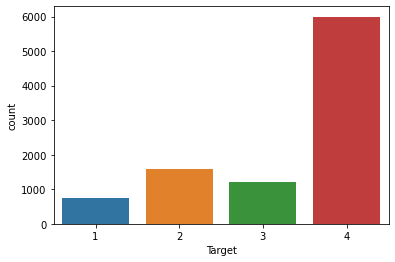

In [90]:
import seaborn as sns
sns.countplot(x='Target', data=df_train)
plt.show()


In [ ]:
#ANS 4. members of the house have the different poverty level as seen below.


In [91]:
print("No. of unique values in 'idhogar' :", (df_train.idhogar.nunique()))
print("No. of total rows in 'train' :", (df_train.shape[0]))

No. of unique values in 'idhogar' : 2988
No. of total rows in 'train' : 9557


In [ ]:
#ANS 5. there are many without a family head as seen below

In [92]:
print("house Identifier with different poverty levels :")
(df_train.groupby('idhogar')['Target'].nunique()>1).index

house Identifier with different poverty levels :


Index(['001ff74ca', '003123ec2', '004616164', '004983866', '005905417',
       '006031de3', '006555fe2', '00693f597', '006b64543', '00941f1f4',
       ...
       'ff250fd6c', 'ff31b984b', 'ff38ddef1', 'ff6d16fd0', 'ff703eed4',
       'ff9343a35', 'ff9d5ab17', 'ffae4a097', 'ffe90d46f', 'fff7d6be1'],
      dtype='object', name='idhogar', length=2988)

In [93]:
 print("house Identifier without a family head :")
(df_train.groupby('idhogar')['parentesco1'].sum()==0).index

house Identifier without a family head :


Index(['001ff74ca', '003123ec2', '004616164', '004983866', '005905417',
       '006031de3', '006555fe2', '00693f597', '006b64543', '00941f1f4',
       ...
       'ff250fd6c', 'ff31b984b', 'ff38ddef1', 'ff6d16fd0', 'ff703eed4',
       'ff9343a35', 'ff9d5ab17', 'ffae4a097', 'ffe90d46f', 'fff7d6be1'],
      dtype='object', name='idhogar', length=2988)

In [ ]:
#ANS 6.Set poverty level of the members and the head of the house within 

In [94]:
target_mean = df_train.groupby('idhogar')['Target'].mean().astype('int64')\
.reset_index()\
.rename(columns={'Target':'Target_mean'})
df_train = df_train.merge(target_mean, how='left', on='idhogar')
df_train.Target = df_train.Target_mean
df_train.drop('Target_mean', axis=1, inplace=True)
df_train.head()


,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,r4m1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,0,3,0,1,1,0,0,1,1,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,0,4,0,1,1,1,0,1,1,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,0,8,0,1,1,0,0,0,0,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,0,5,0,1,1,1,0,2,2,1,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,0,5,0,1,1,1,0,2,2,1,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [95]:
print(df_train.shape)
df_train.drop(['idhogar'], axis=1, inplace=True)
print(df_train.shape)
print("")
print(df_test.shape)
df_test.drop(['idhogar'], axis=1, inplace=True)
print(df_test.shape)

(9557, 139)
(9557, 138)

(23856, 138)
(23856, 137)


In [96]:
df_train['Target'].isnull().sum()

0

In [97]:
y = df_train["Target"]
X = df_train.drop(columns = ['Target'])


In [ ]:
#ANS 9. Predict the accuracy using random forest classifier.


In [100]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
RF_model = RandomForestClassifier(min_samples_leaf=10, min_samples_split=10,random_state=1)
RF_model.fit(X,y)


RandomForestClassifier(min_samples_leaf=10, min_samples_split=10,
                       random_state=1)

In [101]:
pred_train = RF_model.predict(X)
pred_train

array([4, 4, 4, ..., 4, 4, 4], dtype=int64)

In [102]:
print(RF_model,
"\n\nAccuracy Score =", accuracy_score(y_true=y, y_pred=pred_train),
"\n\nConfusion Matrix = \n", confusion_matrix(y_true=y, y_pred=pred_train),
"\n\nClassification Report = \n", classification_report(y_true=y,y_pred=pred_train),
"\n")

RandomForestClassifier(min_samples_leaf=10, min_samples_split=10,
                       random_state=1) 

Accuracy Score = 0.8461860416448677 

Confusion Matrix = 
 [[ 543   23    0  292]
 [   3 1061    0  511]
 [  12   33  519  590]
 [   2    3    1 5964]] 

Classification Report = 
               precision    recall  f1-score   support

           1       0.97      0.63      0.77       858
           2       0.95      0.67      0.79      1575
           3       1.00      0.45      0.62      1154
           4       0.81      1.00      0.90      5970

    accuracy                           0.85      9557
   macro avg       0.93      0.69      0.77      9557
weighted avg       0.87      0.85      0.83      9557
 



In [ ]:
# ANS 10.Check the accuracy using random forest with cross validation

In [103]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(RF_model, X, y, scoring='accuracy', cv=10)
print(np.mean(cv),"\t", min(cv),"\t", max(cv))
print("")
print(cv)


0.6362830511073627 	 0.6 	 0.6548117154811716

[0.65481172 0.65376569 0.63912134 0.63179916 0.63493724 0.65271967
 0.62970711 0.63560209 0.6        0.63036649]
